<a href="https://colab.research.google.com/github/zhouwenxiaobupt/-/blob/master/handwrittenDigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # 手写识别体数字  （0 - 9 ）
 !pip install tensorflow keras numpy mnist matplotlib
 

In [3]:
# 导入数据包
import numpy as np
import mnist  # 获得数据集
import matplotlib.pyplot as plt  # Graph
from keras.models import Sequential  # ANN 网络结构
from keras.layers import Dense # the layer in  the  ANN
import keras
import keras.utils
from keras import utils as np_utils


In [4]:
# 导入数据
train_images = mnist.train_images()  # 训练数据集图片
train_labels = mnist.train_labels()   # 训练标签 
test_images = mnist.test_images()  # 测试图片
test_labels = mnist.test_labels()  # 测试标签



In [5]:
# 规范化图片   规范化像素值[0,255]
# 为了使神经网络更好的训练，我们把值设置为[-0.5 , 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
# 将 28 * 28 像素图片展成 28 * 28 = 784 维向量
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
#打印出来
print(train_images.shape) # 6000个训练数据
print(test_images.shape) # 1000个测试数据

(60000, 784)
(10000, 784)


In [7]:
# 建立模型
# 3层 ，其中两层 64 个神经元 以及激励函数  一层10个神经元 以及归一化指数函数（softmax fuction）
model = Sequential()
model.add( Dense(64, activation="relu", input_dim = 784))
model.add( Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# 编译模型 
# 损失函数衡量模型在训练中的表现 然后进行优化
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8848
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2044 - accuracy: 0.9384
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1558 - accuracy: 0.9522
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9590
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9637
dict_keys(['loss', 'accuracy'])


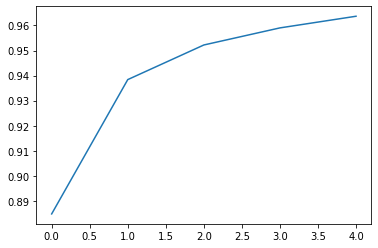

In [11]:
# 训练模型
from keras.utils.np_utils import to_categorical
history=model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5,  #要训​​练的整个数据集的迭代次数
    batch_size = 32  #每个梯度更新的样本数以进行训练

)

print(history.history.keys())
# print(plt.plot(history.history['loss']))
print(plt.plot(history.history['accuracy']))

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')

# plt.show()

In [ ]:
# 评估模型
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1265 - accuracy: 0.9603


[0.12653131783008575, 0.9603000283241272]

In [15]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/data"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['test.jpg', '7.jpg', '1.jpg', '4.jpg']

In [25]:
# 保存模型
# 预测前五个图片
from PIL import Image
import numpy as np
import os

predictions = model.predict(test_images[:5])
img = Image.open("test.jpg").convert("1")
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,784)
y_pred = model.predict(im2arr)


[5]
[7 2 1 0 4]
[7 2 1 0 4]


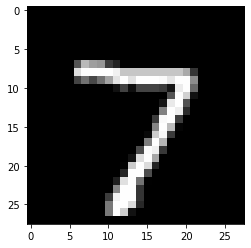

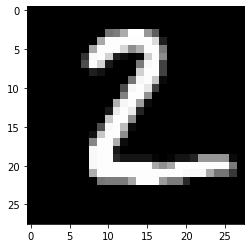

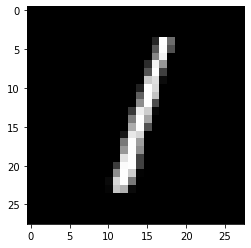

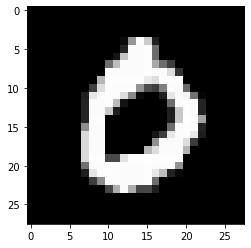

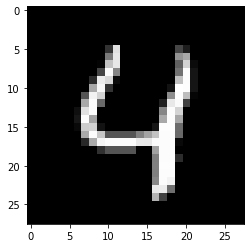

In [ ]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image ,dtype= "float")
  pixels = first_image.reshape((28 ,28))
  plt.imshow(pixels , cmap="gray")
  plt.show()